# VLM Model Comparison for Caption Generation

This notebook compares evaluation metrics of 3 Vision-Language Models (VLM) for caption generation on the F1 dataset.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Metrics

In [2]:
# Models to compare
models = ['blip', 'git-base', 'swin-tiny']

# Load metrics for each model
metrics_data = {}
for model in models:
    with open(f'results/{model}/metrics.json', 'r') as f:
        metrics_data[model] = json.load(f)

print("Metrics loaded for:", list(metrics_data.keys()))

Metrics loaded for: ['blip', 'git-base', 'swin-tiny']


## 2. Comparison Table

### Available Metrics:

- **BLEU-1 to BLEU-4**: Measure n-gram precision (individual words, pairs, triplets, quadruplets). Higher values indicate better similarity with ground truth.
- **METEOR**: Metric that considers synonyms and stemming, more robust than BLEU. Range [0, 1].
- **ROUGE-L**: Measures the longest common subsequence. Useful for evaluating structural coherence of text.

In [3]:
# Create DataFrame for comparison
df = pd.DataFrame(metrics_data).T
df.index.name = 'Model'

# Display table
print("\n" + "="*70)
print("METRICS COMPARISON")
print("="*70 + "\n")
print(df.round(4))
print("\n" + "="*70)

# Identify best model per metric
print("\nBEST MODEL PER METRIC:")
print("-"*70)
for metric in df.columns:
    best_model = df[metric].idxmax()
    best_score = df[metric].max()
    print(f"{metric:<12} → {best_model.upper():<12} ({best_score:.4f})")

df


METRICS COMPARISON

           BLEU-1  BLEU-2  BLEU-3  BLEU-4  METEOR  ROUGE-L
Model                                                     
blip       0.1366  0.0383  0.0084  0.0041  0.0982   0.1668
git-base   0.0516  0.0220  0.0113  0.0050  0.0728   0.1269
swin-tiny  0.0762  0.0198  0.0037  0.0016  0.1086   0.0914


BEST MODEL PER METRIC:
----------------------------------------------------------------------
BLEU-1       → BLIP         (0.1366)
BLEU-2       → BLIP         (0.0383)
BLEU-3       → GIT-BASE     (0.0113)
BLEU-4       → GIT-BASE     (0.0050)
METEOR       → SWIN-TINY    (0.1086)
ROUGE-L      → BLIP         (0.1668)


,BLEU-1,BLEU-2,BLEU-3,BLEU-4,METEOR,ROUGE-L
Model,,,,,,
blip,0.136636,0.038293,0.008435,0.004115,0.098204,0.166837
git-base,0.051596,0.021978,0.011340,0.004990,0.072839,0.126901
swin-tiny,0.076250,0.019774,0.003719,0.001624,0.108553,0.091429


## 3. Comparative Visualization

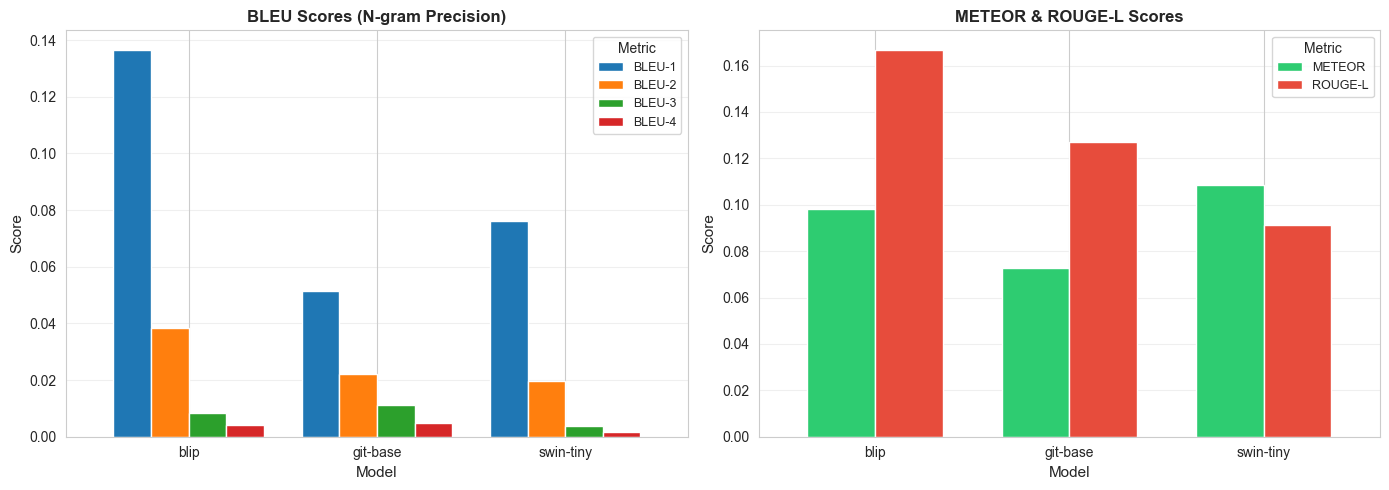


Chart saved to: results/model_comparison.png


In [4]:
# Grouped bar chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Subplot 1: BLEU scores
bleu_cols = [col for col in df.columns if 'BLEU' in col]
df[bleu_cols].plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('BLEU Scores (N-gram Precision)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Model', fontsize=11)
axes[0].set_ylabel('Score', fontsize=11)
axes[0].legend(title='Metric', fontsize=9)
axes[0].set_xticklabels(df.index, rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Subplot 2: METEOR and ROUGE-L
other_cols = ['METEOR', 'ROUGE-L']
df[other_cols].plot(kind='bar', ax=axes[1], width=0.7, color=['#2ecc71', '#e74c3c'])
axes[1].set_title('METEOR & ROUGE-L Scores', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Model', fontsize=11)
axes[1].set_ylabel('Score', fontsize=11)
axes[1].legend(title='Metric', fontsize=9)
axes[1].set_xticklabels(df.index, rotation=0)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('results/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved to: results/model_comparison.png")

## 4. Summary Analysis

In [5]:
# Calculate average of all metrics (normalized)
df_normalized = df.copy()
for col in df_normalized.columns:
    max_val = df_normalized[col].max()
    if max_val > 0:
        df_normalized[col] = df_normalized[col] / max_val

df_normalized['Average'] = df_normalized.mean(axis=1)

print("\nAVERAGE PERFORMANCE (normalized):")
print("-"*40)
for model in df_normalized.index:
    avg_score = df_normalized.loc[model, 'Average']
    print(f"{model.upper():<12}: {avg_score:.4f} ({avg_score*100:.1f}%)")

best_overall = df_normalized['Average'].idxmax()
print(f"\nBest overall model: {best_overall.upper()}")


AVERAGE PERFORMANCE (normalized):
----------------------------------------
BLIP        : 0.9122 (91.2%)
GIT-BASE    : 0.7305 (73.1%)
SWIN-TINY   : 0.5460 (54.6%)

Best overall model: BLIP
